### Import

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   str    
 1   datetime     3636 non-null   str    
 2   cash_type    3636 non-null   str    
 3   card         3547 non-null   str    
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   str    
dtypes: float64(1), str(5)
memory usage: 170.6 KB


In [3]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
df.isna().mean() * 100

date           0.000000
datetime       0.000000
cash_type      0.000000
card           2.447745
money          0.000000
coffee_name    0.000000
dtype: float64

In [5]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [6]:
df['cash_type'].value_counts()

cash_type
card    3547
cash      89
Name: count, dtype: int64

In [7]:
df.duplicated(subset=['card'], keep=False).value_counts()

True     2865
False     771
Name: count, dtype: int64

### Clear missing value

In [8]:
df_clean = df.dropna(subset=['card'])

In [9]:
df_clean.isna().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [10]:
df_final = df_clean[['datetime', 'cash_type', 'card', 'money', 'coffee_name']]

In [11]:
df_final.info()

<class 'pandas.DataFrame'>
Index: 3547 entries, 0 to 3635
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     3547 non-null   str    
 1   cash_type    3547 non-null   str    
 2   card         3547 non-null   str    
 3   money        3547 non-null   float64
 4   coffee_name  3547 non-null   str    
dtypes: float64(1), str(4)
memory usage: 166.3 KB


### Explore data

### Waktu,Penjualan & Segment

In [14]:
df_fc = df_final[['datetime','coffee_name','money']]
df_fc.head()

,datetime,coffee_name,money
0,2024-03-01 10:15:50.520,Latte,38.7
1,2024-03-01 12:19:22.539,Hot Chocolate,38.7
2,2024-03-01 12:20:18.089,Hot Chocolate,38.7
3,2024-03-01 13:46:33.006,Americano,28.9
4,2024-03-01 13:48:14.626,Latte,38.7


In [16]:
df_fc.dtypes

datetime           str
coffee_name        str
money          float64
dtype: object

In [19]:
df_fc['datetime'] = pd.to_datetime(df_fc['datetime'])
df_fc = df_fc.sort_values('datetime')

In [25]:
df_daily = (
    df_fc
    .groupby(df_fc['datetime'].dt.date)['money']
    .sum()
    .reset_index()
)


df_daily.columns = ['date', 'money']
df_daily.head()

,date,money
0,2024-03-01,396.3
1,2024-03-02,188.1
2,2024-03-03,309.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [26]:
df_daily['money'].describe()

count    381.000000
mean     294.607822
std      163.167893
min       23.020000
25%      172.420000
50%      272.360000
75%      380.620000
max      836.660000
Name: money, dtype: float64

<Axes: xlabel='date'>

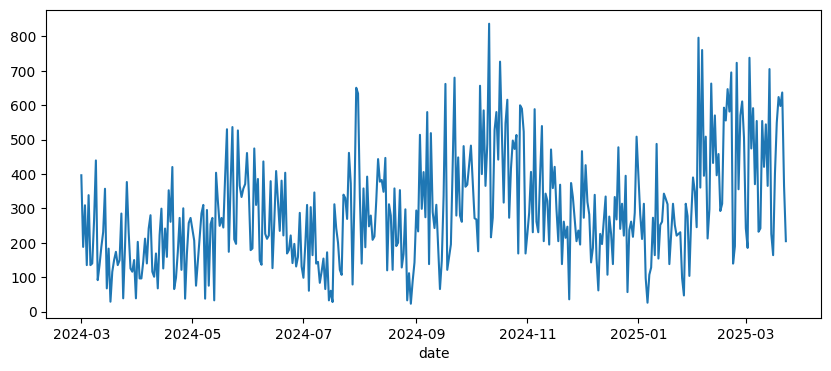

In [32]:
import matplotlib.pyplot as plt
df_daily.set_index('date')['money'].plot(figsize=(10,4))

In [34]:
df_segment = (
    df_fc
    .groupby([
        df_fc['datetime'].dt.date,
        'coffee_name'
    ])['money']
    .sum()
    .reset_index()
)

df_segment.columns = ['date', 'coffee_name', 'money']
df_segment.head()

,date,coffee_name,money
0,2024-03-01,Americano,28.9
1,2024-03-01,Americano with Milk,135.2
2,2024-03-01,Cocoa,38.7
3,2024-03-01,Hot Chocolate,116.1
4,2024-03-01,Latte,77.4
